# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Import Dataset

In [ ]:
url = 'https://github.com/Rafiy27/Pemodelan-dan-Optimasi/raw/main/Parkinson.xlsx'
df = pd.read_excel(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Menyiapkan Dataset

In [ ]:
features = df.drop(['name', 'status'], axis=1)
labels = df['status']
features.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Membuat DataFrame baru untuk data yang telah dinormalisasi
normalized_df = pd.DataFrame(features_normalized, columns=features.columns)

print(normalized_df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

In [ ]:
# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# Model ANN
Memodelkan Artificial Neural Network (ANN) dengan lima hidden layer menggunakan TensorFlow. Dengan struktur yang dimulai dari input layer dengan 128 neuron diikuti oleh empat hidden layer berturut-turut dengan jumlah neuron 64, 32, 16, dan 8, di mana semuanya menggunakan aktivasi ReLU. Output layer terdiri dari satu neuron dengan fungsi aktivasi sigmoid.

In [ ]:
# Model ANN dengan lima hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model Optimasi Nadam

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Melatih Model

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 3s 65ms/step - loss: 0.6036 - accuracy: 0.7372 - val_loss: 0.5188 - val_accuracy: 0.8205
Epoch 2/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.4761 - accuracy: 0.7372 - val_loss: 0.4114 - val_accuracy: 0.8205
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.3974 - accuracy: 0.7372 - val_loss: 0.3641 - val_accuracy: 0.8205
Epoch 4/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.3508 - accuracy: 0.7436 - val_loss: 0.3402 - val_accuracy: 0.8462
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.3174 - accuracy: 0.7949 - val_loss: 0.3256 - val_accuracy: 0.8718
Epoch 6/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.2922 - accuracy: 0.8333 - val_loss: 0.3204 - val_accuracy: 0.8974
Epoch 7/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.2689 - accuracy: 0.8782 - val_loss: 0.3222 - val_accuracy: 0.8974
Epoch 8/1000


# Evaluasi Model

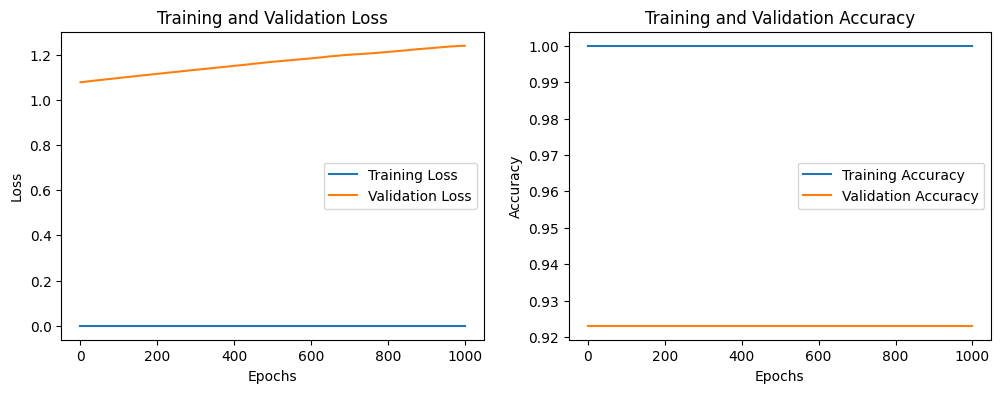

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Plot kurva loss dan akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
# Accuracy
eval_result = model.evaluate(X_test, y_test)
print("Accuracy:", eval_result[1])

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

2/2 [==============================] - 0s 8ms/step - loss: 1.0778 - accuracy: 0.9231
Accuracy: 0.9230769276618958
2/2 [==============================] - 0s 7ms/step
F1 Score: 0.955223880597015


2/2 [==============================] - 0s 7ms/step


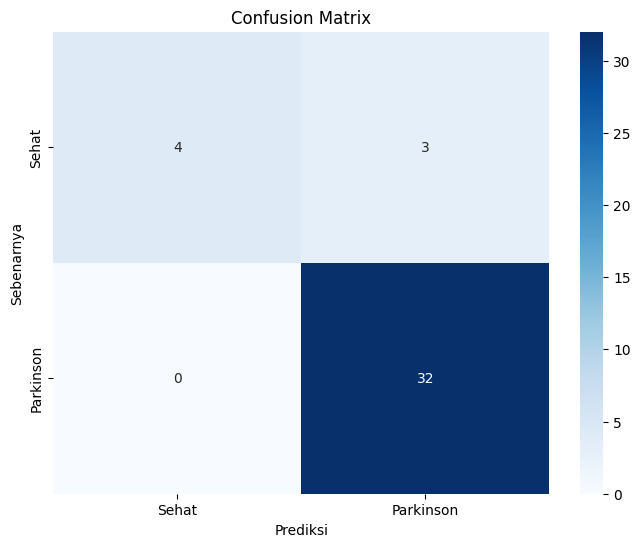

In [ ]:
# Prediksi menggunakan model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Parkinson'], yticklabels=['Sehat', 'Parkinson'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()